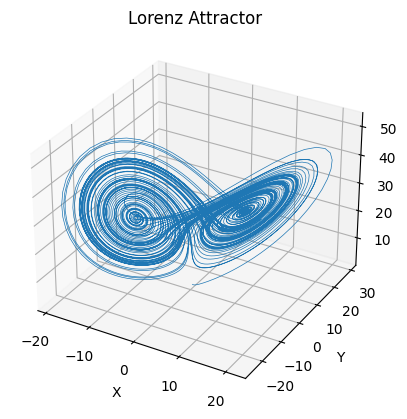

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def lorenz(xyz, *, s=10, r=28, b=2.667):
    # Lorenz paramters and initial conditions
    x, y, z = xyz
    x_dot = s*(y-x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0., 1., 1.05)

for i in range(num_steps):
    xyzs[i+1] = xyzs[i] + lorenz(xyzs[i]) * dt
    
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

plt.show()


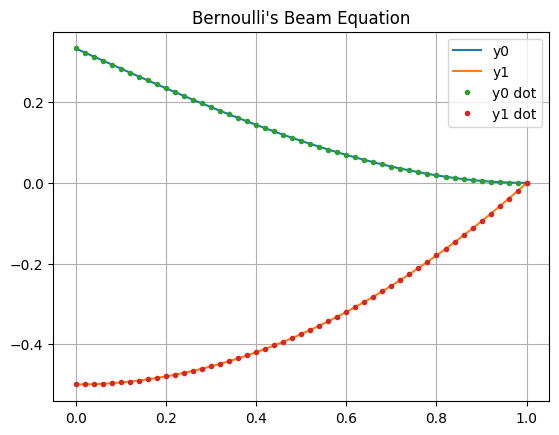

In [18]:
from scipy.integrate import solve_ivp

x = np.linspace(0,1,51)
y1, y0 = (x**2-1)/2, (x**3-3*x+2)/6

s = solve_ivp(
        lambda x, Y: [Y[1], x],
        [1., 0.],
        [0., 0.],
        t_eval=np.linspace(1, 0, 101)
    )

ax = plt.figure().add_subplot()
ax.set_title('''Bernoulli's Beam Equation''')
ax.plot(x, y0, label='y0')
ax.plot(x, y1, label='y1')
ax.plot(s.t[::2], s.y[0][::2], label='y0 dot', linestyle='', marker='.')
ax.plot(s.t[::2], s.y[1][::2], label='y1 dot', linestyle='', marker='.')
ax.legend()
ax.grid()


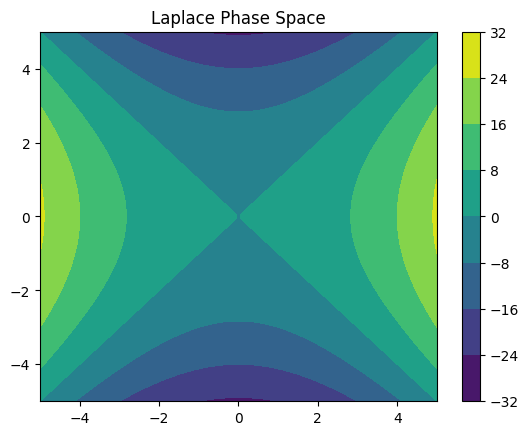

In [23]:
def laplace(x, y):
    return x**2 - y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = laplace(X, Y)

ax = plt.figure().add_subplot()
ax.set_title("Laplace Phase Space")
plt.contourf(X, Y, Z)
plt.colorbar()